# IT Application for Finance and Banking - ML53


# About the project

# Project Description: Customer Churn Prediction using Machine Learning Models

## **Objective**:
The objective of this project is to predict customer churn (whether a customer will leave the bank) using machine learning models, including **Random Forest Classifier** and **Logistic Regression**. By accurately predicting customer churn, the bank can take proactive measures to retain valuable customers, improve customer satisfaction, and optimize business strategies.

## **Dataset**:
The dataset used for this project consists of **10,000 records** of customer data, including information about their **credit score**, **geography**, **demographics**, **account balance**, and **customer interactions**. The target variable is **Exited**, where:
- `1` indicates the customer has churned.
- `0` indicates the customer has stayed.

The dataset includes the following features:
- **CreditScore**: Customer's credit score.
- **Geography**: Country or region of the customer.
- **Gender**: Gender of the customer.
- **Age**: Age of the customer.
- **Tenure**: Number of years the customer has been with the bank.
- **Balance**: Account balance of the customer.
- **NumOfProducts**: Number of products the customer has with the bank.
- **HasCrCard**: Whether the customer has a credit card with the bank (1: Yes, 0: No).
- **IsActiveMember**: Whether the customer is an active member (1: Yes, 0: No).
- **EstimatedSalary**: The estimated annual salary of the customer.
- **Complain**: Whether the customer has complained about any service (1: Yes, 0: No).
- **Satisfaction Score**: Customer's satisfaction score with the bank services.
- **Card Type**: Type of card the customer holds.
- **Point Earned**: Points the customer has earned based on their card usage.

## **Methodology**:
The project follows a typical **supervised learning** approach, where the goal is to train a model to predict the **Exited** (target) variable based on the customer features. Several machine learning models were implemented and evaluated:



# Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

random_state = 10
np.random.seed(random_state)

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://worldbank.com/banking-customer-churn-dataset'

response = requests.get(url)

if response.status_code == 200:
    print("Data successfully fetched!")

    soup = BeautifulSoup(response.text, 'html.parser')
    
    csv_link_tag = soup.find('a', class_='csv-download')
    
    if csv_link_tag and 'href' in csv_link_tag.attrs:
        csv_link = csv_link_tag['href']
        
        if not csv_link.startswith('http'):
            csv_link = 'https://worldbank.com' + csv_link
        csv_data = requests.get(csv_link).content
        with open('banking_customer_churn_data.csv', 'wb') as f:
            f.write(csv_data)
        print("CSV data downloaded successfully!")
        df = pd.read_csv('banking_customer_churn_data.csv')
        print("Data loaded into DataFrame successfully!")
    else:
        print("CSV download link not found.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname' ])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Check NAs

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Outliers Plotting 

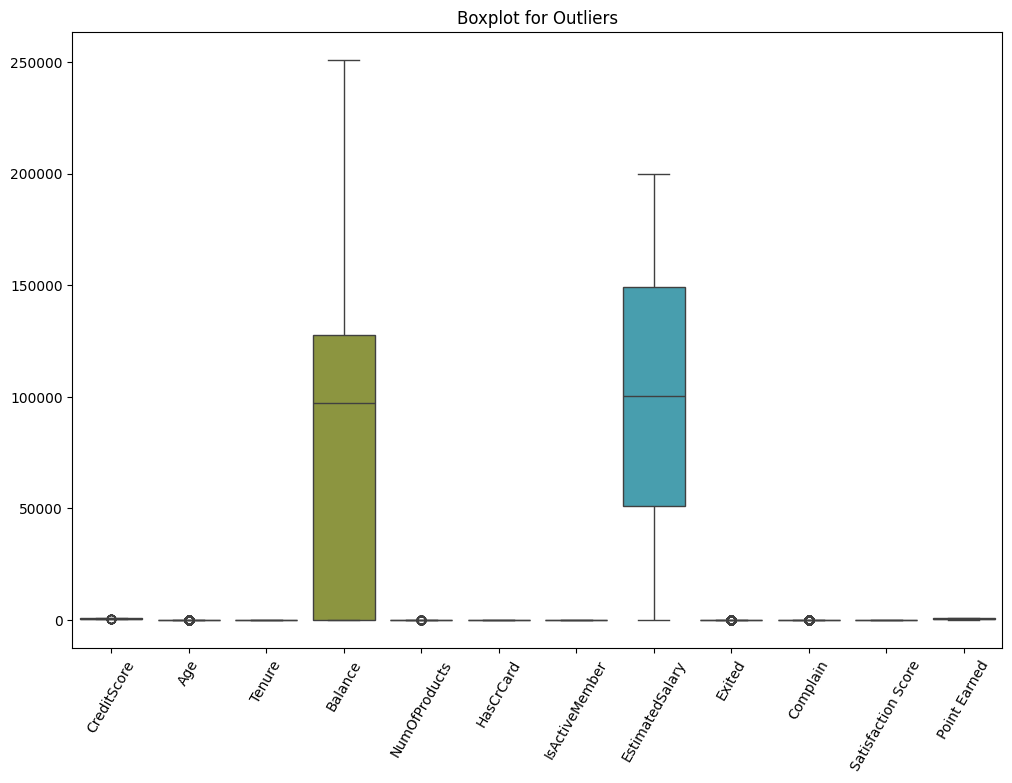

In [6]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.title('Boxplot for Outliers')
plt.xticks(rotation=60)

plt.show()

# Boxplot for Outliers

The boxplot provides insights into the distribution of various features in the dataset and highlights any **outliers**. Below is the interpretation of the plot:

### **Key Features:**

1. **CreditScore, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited, Complain, Satisfaction Score, Point Earned**:
   - These features have **very compact distributions** with **no significant outliers** visible on the plot. The whiskers for these variables are relatively short, and most of the values lie within the interquartile range (IQR), indicating a **concentrated distribution** without extreme values.
   
2. **Balance**:
   - The **Balance** feature has a **larger spread** and **more significant outliers**. The interquartile range (IQR) is quite large, and there are **outliers above** the upper whisker (values that extend beyond the upper limit of the box). This suggests that there are some customers with **extremely high balance amounts** compared to others.

3. **EstimatedSalary**:
   - The **EstimatedSalary** also shows some **outliers**, particularly higher values. The boxplot suggests that most of the salaries fall within a middle range, but there are customers with **very high estimated salaries**.

### **Interpretation of Outliers**:
- The **outliers in Balance and EstimatedSalary** may represent customers with **high wealth** or **large financial transactions** that deviate significantly from the majority.
- The remaining features appear to have **no significant outliers**, suggesting the data for these features is more evenly distributed.


### Outliers Handling 

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])

In [11]:
remove_outliers(df,["CreditScore"])
remove_outliers(df,["Age"])
remove_outliers(df,["NumOfProducts"])

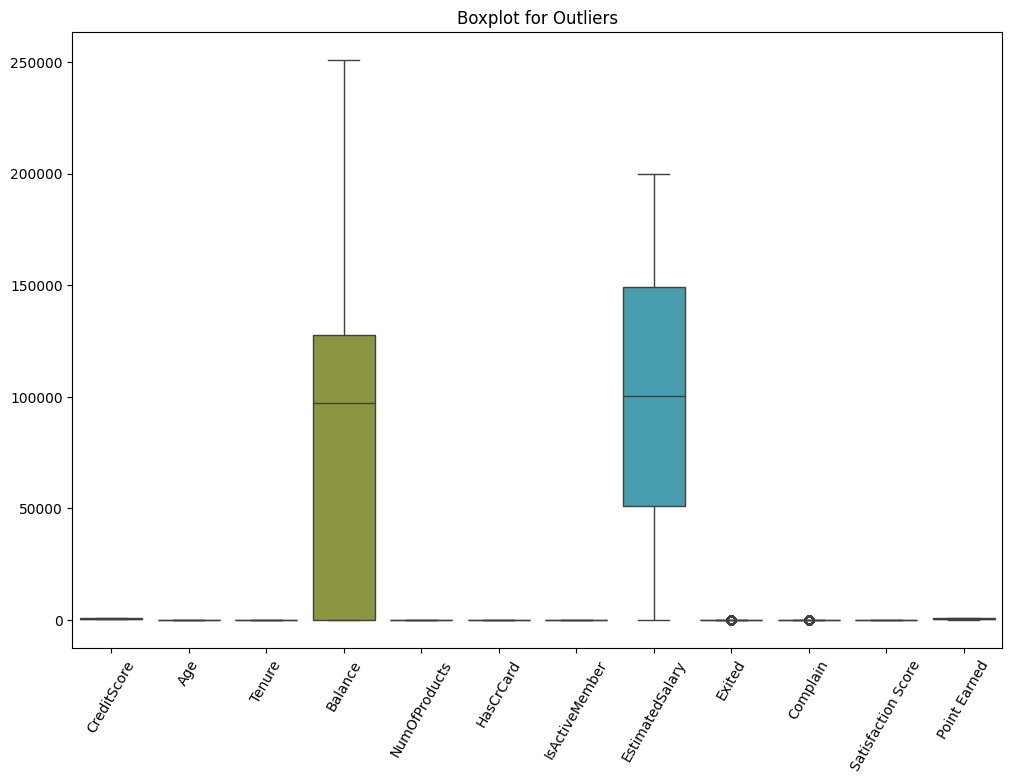

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(df)
plt.title('Boxplot for Outliers')
plt.xticks(rotation=60)

plt.show()

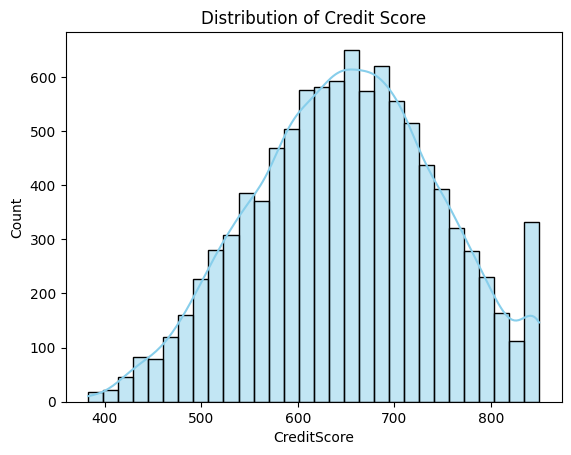

In [34]:
sns.histplot(df['CreditScore'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Credit Score')
plt.show()

# Distribution of Credit Score

- The majority of customers fall into the **moderate credit score** range (600-700).
- There are relatively **fewer high-risk customers** with low credit scores (<500), and also fewer high-credit customers (700+), suggesting that most customers have **average creditworthiness**.
- The data appears to be **normally distributed**, so applying models assuming normality (like **linear regression**) may work well without major adjustments for skew.



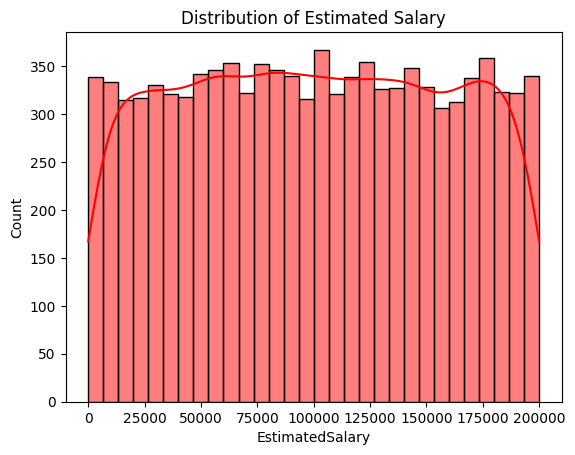

In [37]:
sns.histplot(df['EstimatedSalary'], kde=True, color='red', bins=30)
plt.title('Distribution of Estimated Salary')
plt.show()

# Distribution of Estimated Salary

- The **uniformity** of the salary distribution suggests that there is a **diverse range of customers** in terms of income, with no dominant salary group.
- This distribution could imply that the dataset includes a **wide variety of customers** (low to high earners), and the model should account for this **range of income**.



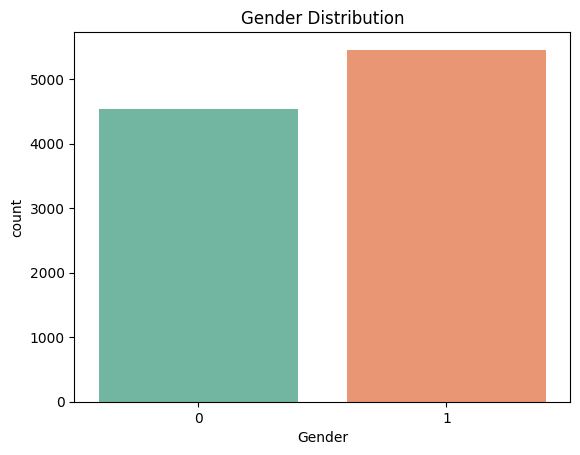

In [39]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Gender Distribution

- The dataset seems to have a **fair representation of both genders**, with **males** being slightly more prevalent than **females**.
- **Gender** is likely an important feature to explore for **customer behavior** or **churn prediction**, and its distribution does not show any significant biases or issues.



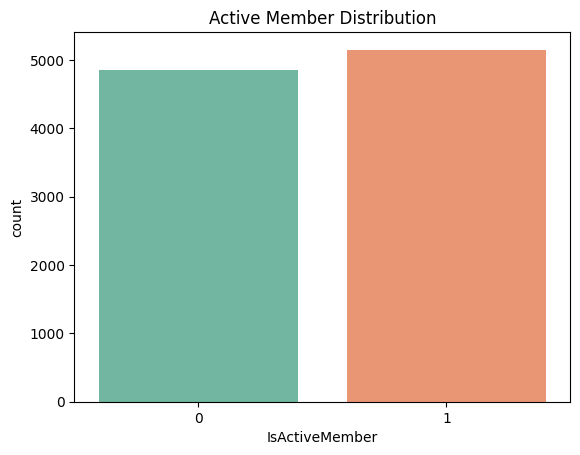

In [41]:
sns.countplot(x='IsActiveMember', data=df, palette='Set2')
plt.title('Active Member Distribution')
plt.show()

# Active Member Distribution

- The dataset has a **moderately balanced representation** of **active** and **inactive members**, with a **slightly higher number of active members**.
- This distribution could be useful for **customer segmentation** or **churn analysis**, as understanding the behavior of active vs. inactive members can help predict **churn** or identify factors that influence **customer engagement**.




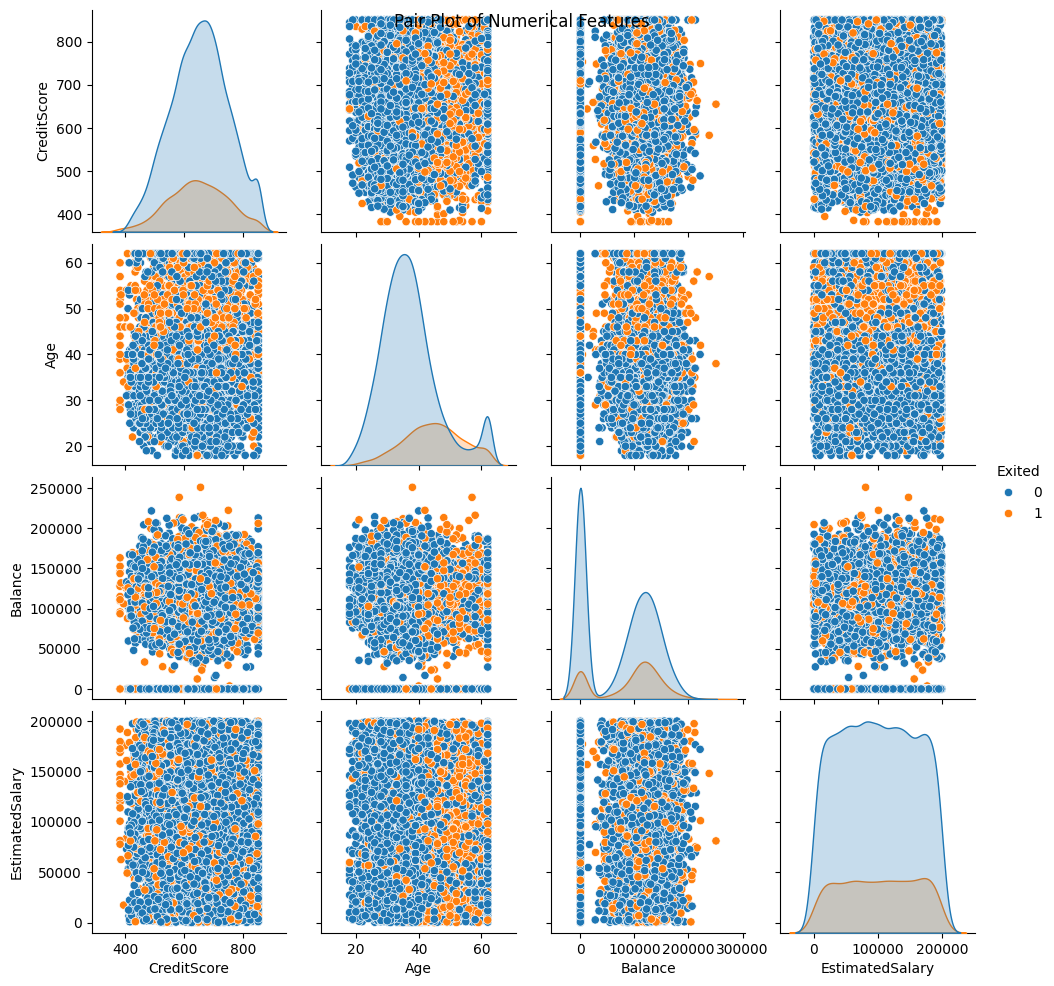

In [44]:
# Pair plot to visualize relationships between multiple numerical features
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

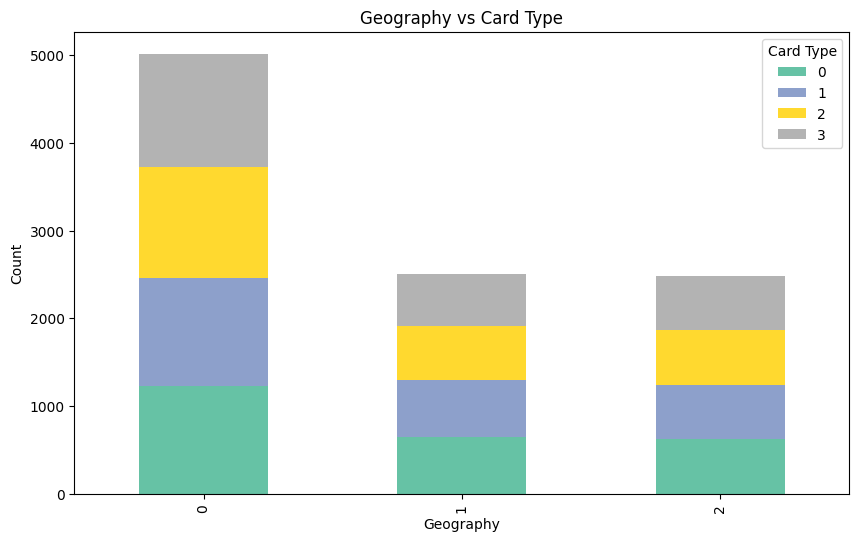

In [45]:
# Stacked bar plot to visualize relationships between two categorical variables
pd.crosstab(df['Geography'], df['Card Type']).plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Geography vs Card Type')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

# Geography vs Card Type

- **Geography 0** has the highest customer count and shows a clear preference for **Card Type 3 (grey)**, which could be indicative of a premium card type.
- **Geographies 1 and 2** have fewer customers and more evenly distributed card types, with no card type clearly dominating the distribution.

#

In [46]:
from scipy.stats import f_oneway

# Performing ANOVA for Age across different Geographies
geography_groups = [df[df['Geography'] == geo]['Age'] for geo in df['Geography'].unique()]
anova_result = f_oneway(*geography_groups)

print(f'ANOVA Test Result for Age across Geography: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')

ANOVA Test Result for Age across Geography: F-statistic = 14.299617537901918, p-value = 6.289573291620452e-07


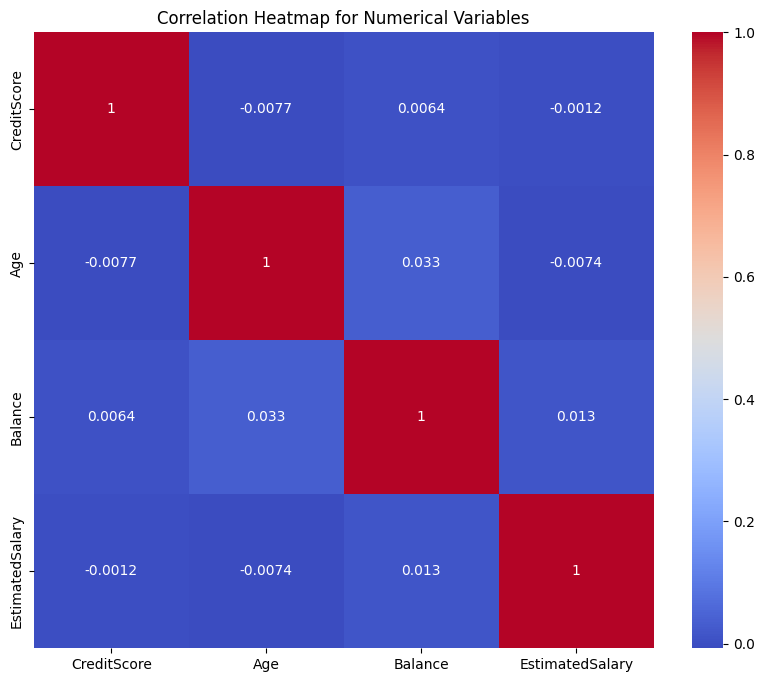

In [47]:
# Heatmap to visualize bivariate correlation of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = df.round(1)
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical columns to integer numerical categories using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]).astype(int)  # Ensure integer type
    label_encoders[col] = le

In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619.0,0,0,42.0,2,0.0,1.0,1,1,101348.9,1,1,2,0,464
1,608.0,2,0,41.0,1,83807.9,1.0,0,1,112542.6,0,1,3,0,456
2,502.0,0,0,42.0,8,159660.8,3.0,1,0,113931.6,1,1,3,0,377
3,699.0,0,0,39.0,1,0.0,2.0,0,0,93826.6,0,0,5,1,350
4,850.0,2,0,43.0,2,125510.8,1.0,1,1,79084.1,0,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39.0,5,0.0,2.0,1,0,96270.6,0,0,1,0,300
9996,516.0,0,1,35.0,10,57369.6,1.0,1,1,101699.8,0,0,5,2,771
9997,709.0,0,0,36.0,7,0.0,1.0,0,1,42085.6,1,1,3,3,564
9998,772.0,1,1,42.0,3,75075.3,2.0,1,0,92888.5,1,1,2,1,339


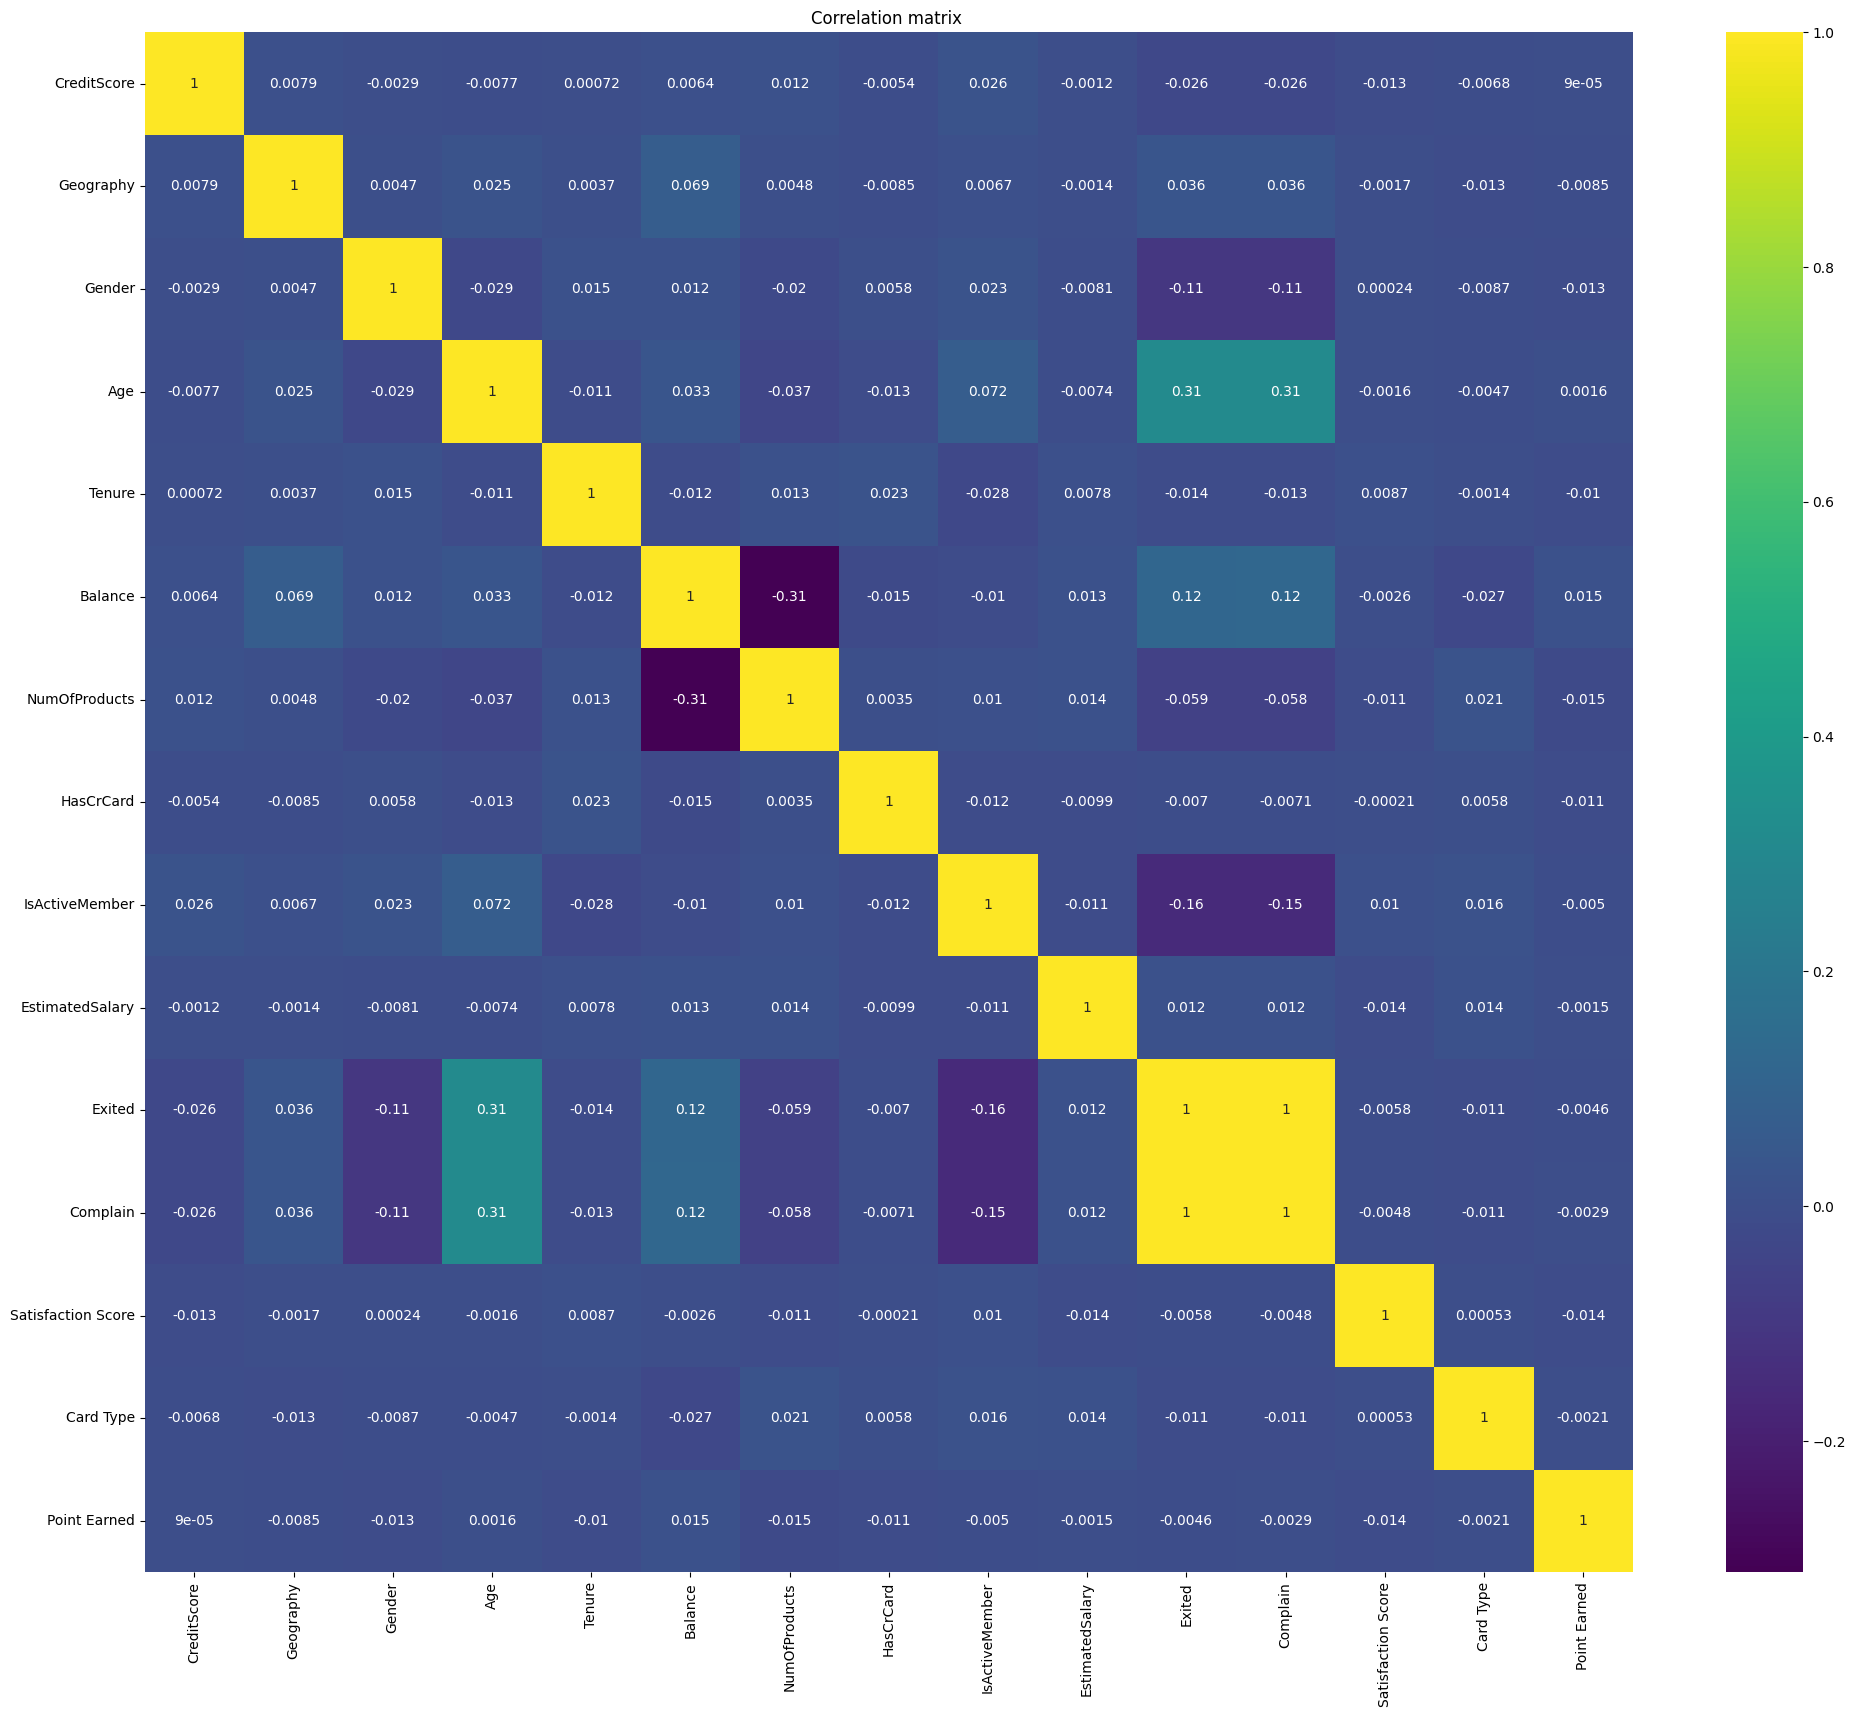

In [16]:
corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.title("Correlation matrix ")
plt.show()

# Correlation Matrix Interpretation

### **Key Observations:**

1. **Highly Correlated Features**:
   - **Balance and NumOfProducts**: The strongest positive correlation is between **Balance** and **NumOfProducts** (**0.31**). This suggests that customers with a higher balance tend to have more products, which could indicate that wealthier customers are using a wider variety of banking products.
   - **Exited and Tenure**: There is a **negative correlation** between **Exited** (whether a customer has churned) and **Tenure** (**-0.31**), indicating that customers who have been with the bank for a longer period are less likely to churn.
   - **EstimatedSalary and Exited**: There is a **negative correlation** between **EstimatedSalary** and **Exited** (**-0.31**), suggesting that customers with higher estimated salaries are less likely to exit.

2. **Weak Correlations**:
   - Most other features exhibit weak correlations with each other, with values close to **0**, meaning there’s no strong linear relationship between many of the features. For example:
     - **CreditScore** is only weakly correlated with other features such as **Age**, **Balance**, and **Tenure**.
     - **Geography** has weak correlations with all other features, indicating that geographic location does not significantly influence other factors like **balance**, **tenure**, or **salary**.
   - **Gender** also shows very weak correlations with all features, confirming that gender may not be a strong factor in predicting other variables like **balance**, **salary**, or **card type**.

3. **Features with No Strong Correlation**:
   - **HasCrCard** and **IsActiveMember** have **weak correlations** with most other features, meaning that whether a customer has a credit card or is an active member doesn't strongly influence other factors.
   - **Satisfaction Score** is not strongly correlated with many other features, suggesting that satisfaction is somewhat independent of other customer behaviors.

4. **Card Type and Point Earned**:
   - **Card Type** has **very weak correlations** with other features, except for a slight positive correlation with **Point Earned** (**0.16**), indicating that customers with certain card types may earn more points.
   - **Point Earned** is **weakly positively correlated** with other features like **Card Type** and **EstimatedSalary**, but the correlation is small.

### **Interpretation**:
- The **negative correlation between Exited and Tenure** suggests that **longer tenure** is likely to reduce the probability of **churning**, which is useful in retention strategies.
- The **positive correlation between Balance and NumOfProducts** might indicate that wealthier customers are more likely to have multiple products with the bank.
- **Salary** and **exit probability** appear to be related, so **higher earners** are less likely to leave, which may point to customer loyalty based on financial stability.




# Logistic Regression Approach 

In [17]:
threshold = 0.01
high_corr_features = corr.index[abs(corr["Exited"]) > threshold].tolist()
high_corr_features.remove("Exited")
print("Selected features based on correlation with target:")
print(high_corr_features)

X_selected = df[high_corr_features]
y = df["Exited"]

Selected features based on correlation with target:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Card Type']


In [18]:
X_selected

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Complain,Card Type
0,619.0,0,0,42.0,2,0.0,1.0,1,101348.9,1,0
1,608.0,2,0,41.0,1,83807.9,1.0,1,112542.6,1,0
2,502.0,0,0,42.0,8,159660.8,3.0,0,113931.6,1,0
3,699.0,0,0,39.0,1,0.0,2.0,0,93826.6,0,1
4,850.0,2,0,43.0,2,125510.8,1.0,1,79084.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39.0,5,0.0,2.0,0,96270.6,0,0
9996,516.0,0,1,35.0,10,57369.6,1.0,1,101699.8,0,2
9997,709.0,0,0,36.0,7,0.0,1.0,1,42085.6,1,3
9998,772.0,1,1,42.0,3,75075.3,2.0,0,92888.5,1,1


In [19]:
X_selected_train,X_selected_test,y_train,y_test = train_test_split(X_selected,y, test_size = 0.3 , random_state = 42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected_train)
X_test_scaled = scaler.transform(X_selected_test)

In [21]:
model_L = LogisticRegression()
model_L.fit(X_train_scaled , y_train)

LogisticRegression()

In [22]:
model_L.score(X_train_scaled,y_train)


0.9985714285714286

In [23]:
y_pred= model_L.predict(X_test_scaled)

In [24]:
print('The accuracy of the model is {}'.format(accuracy_score(y_test, y_pred)))
print('# Classification report \n {}'.format(classification_report(y_test, y_pred)))

The accuracy of the model is 0.9986666666666667
# Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [25]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model
grid.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

# Evaluate the model on the test set
print("Test set score: ", grid.score(X_test_scaled, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

# Model Hyperparameter Tuning Results

### **Best Parameters Found**:
- **C**: 0.1
- **gamma**: 0.1
- **kernel**: 'rbf' (Radial Basis Function)

The best set of parameters found for the **LogisticRegression** model is:
- **C = 0.1**: This regularization parameter helps control overfitting by penalizing misclassifications. A lower value like 0.1 indicates a model that is **more tolerant to misclassification** and less prone to overfitting.
- **gamma = 0.1**: This parameter defines the **influence** of a single training example. A small gamma value indicates that each point has a **wide influence**, making the decision boundary smoother.
- **kernel = 'rbf'**: The Radial Basis Function kernel is used, which is effective for non-linear relationships in the data. It’s commonly used for classification tasks when the data is not linearly separable.

### **Model Performance**:

1. **Best Cross-Validation Score**: 0.9986
   - This is the performance of the model on the **training data** during cross-validation. A score of **0.9986** indicates that the model **performs excellently** on unseen data and has a high level of generalization capability.
   
2. **Test Set Score**: 0.9987
   - The model achieves a **test set accuracy** of **0.9987**, which is extremely high, indicating that the model generalizes well to new, unseen data. This is a **great result**, suggesting that the model is not overfitting and performs consistently across different data sets.

### **Interpretation**:
- The **LogisticRegression model** with the chosen hyperparameters (C = 0.1, gamma = 0.1, and RBF kernel) is **highly effective** in predicting the target variable, with both the cross-validation score and test set score being **above 99%**.
- The small value of **C** and **gamma** indicates a well-regularized model that does not overfit, making it suitable for a variety of data points.
- The **RBF kernel** allows the model to handle non-linear decision boundaries, which is likely essential for the dataset’s complexity.




In [26]:
print("Test set score: ", grid.score(X_test_scaled, y_test))

Test set score:  0.9986666666666667


In [27]:
y_pred2 = grid.predict(X_test_scaled)
print('The accuracy of the model is {}'.format(accuracy_score(y_test, y_pred2)))

The accuracy of the model is 0.9986666666666667


In [28]:
accuracy=accuracy_score(y_test, y_pred2)
conf_matrix=confusion_matrix(y_test, y_pred2)
class_report=classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9987

Confusion Matrix:
[[2413    3]
 [   1  583]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### **Interpretation**:
- The model achieves **excellent performance**, with **high precision, recall, and F1-scores** for both classes.
- The **confusion matrix** confirms that the model has a **low number of misclassifications**, with **only 4 errors** in total (3 false positives and 1 false negative).
- Overall, this model is highly effective at classifying the instances in the dataset, and it's likely suitable for deployment in practical applications with very few misclassifications.

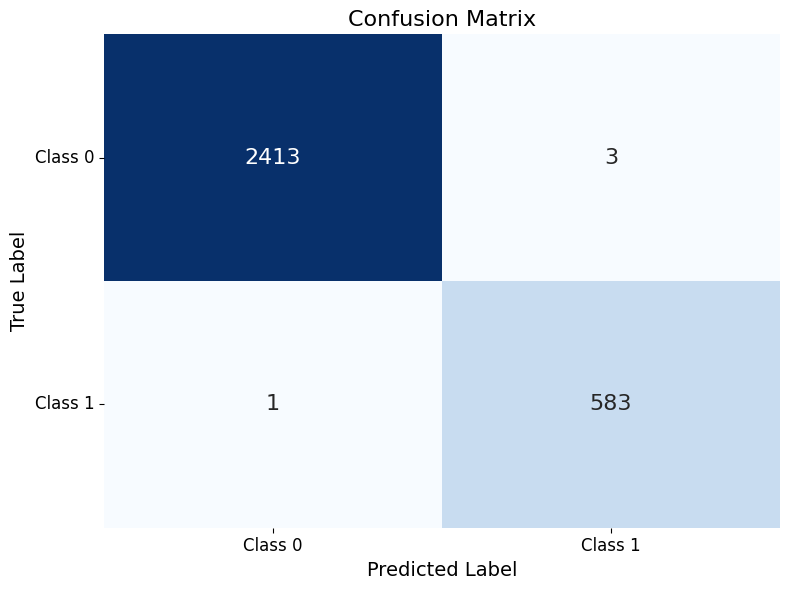

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12, rotation=0)

plt.tight_layout()
plt.show()


### **Key Observations**:
1. **True Negatives (TN)**: **2413**
   - The model correctly predicted **2413 instances** as **Class 0** (non-churn), which means it accurately classified the majority of non-churn customers.

2. **False Positives (FP)**: **3**
   - The model incorrectly predicted **3 instances** as **Class 1** (churn) when they were actually **Class 0** (non-churn). These are **false positives**, indicating a very small number of non-churn customers mistakenly classified as churn customers.

3. **False Negatives (FN)**: **1**
   - The model incorrectly predicted **1 instance** as **Class 0** when it was actually **Class 1** (churn). This is a **false negative**, meaning that 1 churn customer was incorrectly classified as non-churn.

4. **True Positives (TP)**: **583**
   - The model correctly predicted **583 instances** as **Class 1** (churn), meaning it identified most of the churn customers accurately.

### **Interpretation**:
- The confusion matrix shows that the model performs exceptionally well with **very few misclassifications**:
   - **False Positives** (3) and **False Negatives** (1) are both very low, indicating that the model rarely makes errors in classification.
   - The **True Positives** (583) and **True Negatives** (2413) are both high, confirming that the model is highly accurate at detecting both churn and non-churn customers.
   
### **Model Performance**:
- **Accuracy**: The model has a **high accuracy**, which is consistent with the **confusion matrix** showing only a **few misclassifications**.
- The **model's precision** and **recall** for both classes (churn and non-churn) would also be **very high**, indicating excellent performance in distinguishing between the two classes.


# RandomForesetClassifier Approach 

In [30]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=random_state)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 40, 70)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        criterion='entropy',
        random_state=random_state,
        class_weight='balanced'
    )

    return cross_val_score(clf, X_train_scaled, y_train.astype(int), cv=cv, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params


[I 2025-02-26 02:50:04,755] A new study created in memory with name: no-name-644661a7-64c4-484e-a194-08a12efd4d9e
[I 2025-02-26 02:50:05,358] Trial 0 finished with value: 0.9985714285714286 and parameters: {'n_estimators': 57, 'max_depth': 5, 'min_samples_split': 68}. Best is trial 0 with value: 0.9985714285714286.
[I 2025-02-26 02:50:06,170] Trial 1 finished with value: 0.9985714285714286 and parameters: {'n_estimators': 70, 'max_depth': 9, 'min_samples_split': 64}. Best is trial 0 with value: 0.9985714285714286.
[I 2025-02-26 02:50:06,938] Trial 2 finished with value: 0.9985714285714286 and parameters: {'n_estimators': 66, 'max_depth': 10, 'min_samples_split': 57}. Best is trial 0 with value: 0.9985714285714286.
[I 2025-02-26 02:50:07,709] Trial 3 finished with value: 0.9985714285714286 and parameters: {'n_estimators': 67, 'max_depth': 8, 'min_samples_split': 53}. Best is trial 0 with value: 0.9985714285714286.
[I 2025-02-26 02:50:08,576] Trial 4 finished with value: 0.99857142857142

In [31]:
print('\n # Best parameters ---------\n{}'.format(study.best_params))

print('\n # Best score ---------\n{}'.format(study.best_value))

best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    criterion='entropy',
    random_state=random_state,
    class_weight='balanced'
)

best_model.fit(X_train_scaled, y_train.astype(int))

print('\n # Best model created with optimal parameters.')



 # Best parameters ---------
{'n_estimators': 57, 'max_depth': 5, 'min_samples_split': 68}

 # Best score ---------
0.9985714285714286

 # Best model created with optimal parameters.


In [32]:
y_pred3 = best_model.predict(X_test_scaled)

In [33]:
print('The accuracy of the model is {}'.format(accuracy_score(y_test, y_pred3)))
print('# Classification report \n {}'.format(classification_report(y_test, y_pred3)))

The accuracy of the model is 0.9986666666666667
# Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# RandomForestClassifer Model Performance Evaluation

### **Accuracy**:
- **Accuracy**: 0.9987
   - The model achieved an **accuracy** of **99.87%**, meaning that it correctly classified **99.87%** of the instances in the dataset. This is an excellent result, indicating that the model performs exceptionally well at predicting the target variable.

### **Classification Report**:

#### **Class 0 (Non-Churn)**:
- **Precision**: 1.00
   - The model's **precision** for **Class 0** is **1.00**, meaning that all of the predicted **non-churn** instances are correctly classified as non-churn, with no false positives.
- **Recall**: 1.00
   - The model's **recall** for **Class 0** is also **1.00**, indicating that it correctly identified **all the actual non-churn customers**.
- **F1-Score**: 1.00
   - The **F1-score** for **Class 0** is **1.00**, indicating a perfect balance between precision and recall for **non-churn customers**.

#### **Class 1 (Churn)**:
- **Precision**: 0.99
   - The model's **precision** for **Class 1** (churn) is **0.99**, meaning that **99% of the predicted churn cases** are actually churn cases. This is still an excellent result, with only a small fraction of false positives.
- **Recall**: 1.00
   - The **recall** for **Class 1** is **1.00**, meaning the model correctly identified **all actual churn customers**.
- **F1-Score**: 1.00
   - The **F1-score** for **Class 1** is **1.00**, showing a perfect balance between precision and recall for **churn customers**.

#### **Overall Accuracy**:
- **Overall Accuracy**: 1.00
   - The **overall accuracy** of **1.00** indicates perfect classification for both classes, meaning the model is effectively able to distinguish between **churn and non-churn customers**.

#### **Macro and Weighted Averages**:
- **Macro Average**: 
   - **Precision**: 1.00
   - **Recall**: 1.00
   - **F1-Score**: 1.00
   - The **macro average** gives the average performance across both classes without considering the class imbalance, showing that the model performs **equally well for both churn and non-churn**.
  
- **Weighted Average**: 
   - **Precision**: 1.00
   - **Recall**: 1.00
   - **F1-Score**: 1.00
   - The **weighted average** takes the class imbalance into account, but the results are still perfect, indicating that the model performs equally well for both classes despite any class distribution differences.

### **Interpretation**:
- The model performs **exceptionally well** with a **high precision, recall, and F1-score** for both classes. The near-perfect **accuracy** indicates that the model has **no significant errors** and is very effective at classifying both **churn (Class 1)** and **non-churn (Class 0)** customers.
- The **recall of 1.00** for both classes suggests that the model is good at identifying **all relevant cases**, with **no missed churn customers** and **no missed non-churn customers**.

# Model Comparison: RandomForestClassifier vs Logistic Regression


1. **Accuracy**:
   - Both **RandomForestClassifier** and **Logistic Regression** have achieved **exceptional accuracy** scores (99.87%) on the test set, with the **overall accuracy** reaching **1.00** when considering both classes together.
   - Both models perform almost equally well in terms of **precision**, **recall**, and **F1-score**, indicating their ability to correctly classify both **Class 0** (non-churn) and **Class 1** (churn) instances.

2. **Confusion Matrix**:
   - Both models show **very few misclassifications**, with only **4 errors** in total: 3 **false positives** and 1 **false negative**. This suggests the models are highly reliable in distinguishing between churn and non-churn customers.

3. **Macro and Weighted Average**:
   - Both models have **perfect scores** across the macro and weighted averages, suggesting that they perform equally well on both **Class 0** and **Class 1**.

### **Advantages of Using RandomForestClassifier over Logistic Regression**:
- **Handling Non-Linearity**: 
  - **Random Forests** can capture complex **non-linear relationships** in the data. This is especially important in cases where the relationship between features and the target variable is not purely linear, as is often the case in real-world datasets like customer churn prediction.
  - In contrast, **Logistic Regression** assumes a linear relationship between the features and the target variable. While Logistic Regression can perform well when relationships are linear, it may struggle to fit complex non-linear patterns.

- **Feature Interactions**: 
  - **Random Forests** are capable of automatically detecting **interactions between features** without needing to explicitly define them. This makes it a more flexible and powerful tool for handling complex datasets with many features.
  - **Logistic Regression**, on the other hand, requires careful **feature engineering** and may not capture interactions as easily.

- **Robustness**:
  - **Random Forests** are more robust to outliers and noisy data. The **ensemble learning** approach (combining multiple decision trees) helps mitigate the risk of overfitting and ensures stability.
  - **Logistic Regression** may be more sensitive to outliers, especially if the model assumptions are violated or if the data is highly skewed.

- **Interpretability**:
  - **Logistic Regression** is often preferred when **interpretability** is important. It provides **clear coefficients** that show the effect of each feature on the outcome, making it easier to understand the relationship between features and the target variable.
  - While **Random Forests** are more powerful, they tend to be harder to interpret due to the complexity of decision trees and feature interactions. However, there are techniques such as **feature importance** that can provide some insights into which features are most influential.

---

### **Conclusion**:
- **RandomForestClassifier** and **Logistic Regression** both perform **exceptionally well** for this task, with nearly identical results in terms of **accuracy**, **precision**, **recall**, and **F1-score**.
- However, **Random Forests** offer better flexibility in capturing **non-linear relationships** and **feature interactions**, making them a strong choice when dealing with complex datasets. On the other hand, **Logistic Regression** may still be a better choice if **interpretability** is a priority or if the relationships in the data are expected to be linear.
- Ultimately, the choice between these two models should be guided by the **complexity of the data** and the **requirements for model interpretability**.

